In [91]:
from analyze_results import *
from analyze_results import load_json_files_from_dir
import warnings
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
models = [
    "gemma2b",
    "gemma7b",
    "phi-3",
    "llama-3-8b",
    "llama-2-7b",
    "starling",
    "zephyr",
    "gpt-3.5",
    "gpt-4"
  ]

# Sep score + sep score by insistence

In this section and the following two we compute SEP score of various models for the **Original** experiment, as well as the sep score for various dimensions of the data. 

In [3]:
for model in models: 
    print(model)
    model_outputs = load_json_files_from_dir(f"./model_outputs/eval/{model}/prompt_0")
    processed_output = process_dataset_detailed(model_outputs)
    print(get_separation_score(*processed_output)["sep_metric_mean_std"], "\n")

gemma2b
Including 6000-10000.json
Including 0-3000.json
Including 3000-6000.json
Total items loaded: 9160
neutral      [0.729, 0.011]
insistent     [0.734, 0.01]
global       [0.732, 0.008]
Name: sep_metric_mean_std, dtype: object 

gemma7b
Including 0-9160.json
Total items loaded: 9160
neutral      [0.634, 0.011]
insistent     [0.516, 0.01]
global       [0.569, 0.008]
Name: sep_metric_mean_std, dtype: object 

phi-3
Including 3000-6000.json
Including 0-3000.json
Including 6000-10000.json
Total items loaded: 9160
neutral      [0.189, 0.006]
insistent    [0.081, 0.004]
global       [0.133, 0.004]
Name: sep_metric_mean_std, dtype: object 

llama-3-8b
Including 0-9160.json
Including llama-3-8b.json
Total items loaded: 18320
neutral       [0.39, 0.006]
insistent    [0.232, 0.005]
global       [0.308, 0.004]
Name: sep_metric_mean_std, dtype: object 

llama-2-7b
Including llama-2-7b.json
Including 5000-9160.json
Including 0-5000.json
Total items loaded: 18244
neutral       [0.61, 0.006]
insi

# Sep score by appended type 

In [16]:
for model in models: 
    print(model)
    model_outputs = load_json_files_from_dir(f"./model_outputs/eval/{model}/prompt_0")
    processed_output = process_dataset_detailed(model_outputs)
    print(get_score_by_appended_type(*processed_output)["sep_metric_mean_std"], "\n")

gemma2b
Including 6000-10000.json
Including 0-3000.json
Including 3000-6000.json
Total items loaded: 9160
ll           [0.732, 0.014]
lr           [0.816, 0.012]
rl           [0.616, 0.019]
rr           [0.711, 0.018]
left-any     [0.773, 0.009]
right-any    [0.664, 0.013]
any-left     [0.688, 0.011]
any-right     [0.776, 0.01]
Name: sep_metric_mean_std, dtype: object 

gemma7b
Including 0-9160.json
Total items loaded: 9160
ll           [0.706, 0.013]
lr           [0.538, 0.014]
rl           [0.619, 0.017]
rr           [0.373, 0.016]
left-any      [0.623, 0.01]
right-any    [0.493, 0.012]
any-left      [0.671, 0.01]
any-right    [0.468, 0.011]
Name: sep_metric_mean_std, dtype: object 

phi-3
Including 3000-6000.json
Including 0-3000.json
Including 6000-10000.json
Total items loaded: 9160
ll           [0.203, 0.009]
lr           [0.071, 0.006]
rl           [0.196, 0.009]
rr           [0.064, 0.005]
left-any     [0.137, 0.006]
right-any    [0.129, 0.005]
any-left     [0.199, 0.006]
any-r

# SEP score by task domain

In [17]:
for model in models: 
    print(model)
    model_outputs = load_json_files_from_dir(f"./model_outputs/eval/{model}/prompt_0")
    processed_output = process_dataset_detailed(model_outputs)
    print(get_score_by_domain(*processed_output)["sep_metric_mean_std"], "\n")

gemma2b
Including 6000-10000.json
Including 0-3000.json
Including 3000-6000.json
Total items loaded: 9160
Information    [0.822, 0.013]
Analytical     [0.778, 0.012]
Creative       [0.622, 0.014]
Name: sep_metric_mean_std, dtype: object 

gemma7b
Including 0-9160.json
Total items loaded: 9160
Information    [0.757, 0.014]
Analytical     [0.619, 0.012]
Creative       [0.408, 0.012]
Name: sep_metric_mean_std, dtype: object 

phi-3
Including 3000-6000.json
Including 0-3000.json
Including 6000-10000.json
Total items loaded: 9160
Information    [0.143, 0.007]
Analytical     [0.132, 0.006]
Creative       [0.123, 0.007]
Name: sep_metric_mean_std, dtype: object 

llama-3-8b
Including 0-9160.json
Including llama-3-8b.json
Total items loaded: 18320
Information    [0.424, 0.007]
Analytical     [0.307, 0.006]
Creative       [0.185, 0.006]
Name: sep_metric_mean_std, dtype: object 

llama-2-7b
Including llama-2-7b.json
Including 5000-9160.json
Including 0-5000.json
Total items loaded: 18244
Informat

# Model / prompt selection (main eval code)

In this section, we get sep and utility scores for all models and all modes (evaluation/validation for original/fine-tuning/prompt engineering/ prompt optimization). In particular, we demonstrate how we perform prompt / model selection. 

In [104]:
from typing import Dict, Optional, Union

def get_scores(mode: str, model: str) -> pd.DataFrame:
    """
    Retrieve the scores for a given mode and model.

    Parameters:
    mode (str): The mode to use (e.g., 'eval', 'ft', 'rpo', 'peng').
    model (str): The model name.

    Returns:
    pd.DataFrame: A DataFrame containing the scores for the specified mode and model.
    """    
    scores = get_df_scores_for_model(f"./model_outputs/{mode}/{model}")
    return scores



def analyze(mode: str, model: str) -> None:
    """
    Analyze the scores for a given mode and model, printing the best score and corresponding prompt.

    Parameters:
    mode (str): The mode to use (e.g., 'eval', 'train').
    model (str): The model name.
    """
    scores = get_scores(mode, model)
    sep = list(map(lambda x: x[0], np.array(scores["sep_metric"])))
    ix = np.argmax(sep)
    best_score = sep[ix]
    best_prompt = list(scores["prompt_index"])[ix]
    print(scores)
    print(f"Best score for prompt {best_prompt} is {best_score}")

def map_method_to_util(model: str, only_mean = True) -> Dict[str, Optional[float]]:
    """
    Map methods to their utility scores for a given model.

    Parameters:
    model (str): The model name.
    only_mean (bool): if false, standard error is included, else only the mean. 

    Returns:
    Dict[str, Optional[float]]: A dictionary mapping methods to their utility scores.
    """
    scores = get_scores("eval", model)
    p_ix = scores["prompt_index"]
    utility = scores["probe_in_instruct_asr"]
    method_to_util = {
        "original": None,
        "peng": None,
        "popt": None, 
        "ft": None
    }
    for prompt_index, util in zip(p_ix, utility): 
        if only_mean: 
            util = util[0]
        if prompt_index == "0": 
            method_to_util["original"] = util
        elif "ft" in prompt_index: 
            method_to_util["ft"] = util
        elif "rpo" in prompt_index: 
            method_to_util["popt"] = util
        elif prompt_index.isdigit():
            method_to_util["peng"] = util
    if "phi-3" in model:
        method_to_util["popt"] = method_to_util["original"]
    if "gemma7b" in model:
        method_to_util["peng"] = method_to_util["original"]
    return method_to_util

def map_method_to_sep(model: str) -> Dict[str, Optional[float]]:
    """
    Map methods to their separation metrics for a given model.

    Parameters:
    model (str): The model name.

    Returns:
    Dict[str, Optional[float]]: A dictionary mapping methods to their separation metrics.
    """
    scores = get_scores("eval", model)
    p_ix = scores["prompt_index"]
    sep_values = list(map(lambda x: x[0], scores["sep_metric"]))
    method_to_sep = {
        "original": None,
        "peng": None,
        "popt": None, 
        "ft": None
    }
    for prompt_index, sep_val in zip(p_ix, sep_values): 
        if prompt_index == "0": 
            method_to_sep["original"] = sep_val
        elif "ft" in prompt_index: 
            method_to_sep["ft"] = sep_val
        elif "rpo" in prompt_index: 
            method_to_sep["popt"] = sep_val
        elif prompt_index.isdigit():
            method_to_sep["peng"] = sep_val
        if "phi-3" in model:
            method_to_sep["popt"] = method_to_sep["original"]
        if "gemma7b" in model:
            method_to_sep["peng"] = method_to_sep["original"]
    return method_to_sep

### Prompt Engineering (validation set)

In [100]:
for m in models: 
    print(f"Scores for prompt engineering on the val set for {m}")
    analyze("peng", m)

Scores for prompt engineering on the val set for gemma2b
   prompt_index      sep_metric prompt_in_data_asr probe_in_instruct_asr  \
0             0  [0.707, 0.033]     [0.093, 0.009]        [0.191, 0.012]   
1             1  [0.745, 0.036]     [0.059, 0.007]        [0.149, 0.011]   
2            10  [0.885, 0.041]     [0.019, 0.004]        [0.061, 0.008]   
3            11  [0.673, 0.045]     [0.063, 0.008]          [0.11, 0.01]   
4            12  [0.787, 0.042]     [0.039, 0.006]        [0.094, 0.009]   
5            13  [0.815, 0.029]     [0.052, 0.007]        [0.184, 0.012]   
6            14  [0.716, 0.039]     [0.067, 0.008]        [0.134, 0.011]   
7            15  [0.614, 0.052]     [0.066, 0.008]        [0.088, 0.009]   
8             2    [0.73, 0.04]     [0.053, 0.007]         [0.126, 0.01]   
9             3    [0.72, 0.04]     [0.056, 0.007]         [0.125, 0.01]   
10            4  [0.701, 0.039]     [0.065, 0.008]        [0.137, 0.011]   
11            5  [0.798, 0.026]

### Prompt optimization (validation set) 

In [105]:
for m in models[:7]: 
    print(f"Scores for prompt optimization on the val set for {m}")
    analyze("rpo", m)

Scores for prompt optimization on the val set for gemma2b
   prompt_index      sep_metric prompt_in_data_asr probe_in_instruct_asr  \
0             0  [0.707, 0.033]     [0.093, 0.009]        [0.191, 0.012]   
1           100   [0.75, 0.029]     [0.081, 0.009]         [0.22, 0.013]   
2           125   [0.752, 0.03]     [0.084, 0.009]        [0.202, 0.013]   
3           150  [0.753, 0.029]     [0.082, 0.009]        [0.219, 0.013]   
4            25   [0.72, 0.032]     [0.086, 0.009]        [0.193, 0.012]   
5           250  [0.768, 0.028]     [0.082, 0.009]        [0.233, 0.013]   
6           375   [0.78, 0.026]     [0.082, 0.009]         [0.25, 0.014]   
7            50  [0.767, 0.029]     [0.072, 0.008]         [0.21, 0.013]   
8           500  [0.761, 0.029]     [0.083, 0.009]        [0.222, 0.013]   
9           625  [0.728, 0.028]      [0.107, 0.01]        [0.261, 0.014]   
10           75  [0.728, 0.029]     [0.092, 0.009]        [0.232, 0.013]   

   same_output_rate  
0    [0

### Fine-tuning (validation set)

In [109]:
for m in models[:7]: 
    print(f"Scores for prompt optimization on the val set for {m}")
    analyze("ft", m)

Scores for prompt optimization on the val set for gemma2b
                                     prompt_index      sep_metric  \
0  ft_gemma-1.1-2b-it-sep-fft-lr0.00001-ep3-20354  [0.933, 0.016]   
1  ft_gemma-1.1-2b-it-sep-fft-lr0.00002-ep3-24335  [0.796, 0.027]   
2  ft_gemma-1.1-2b-it-sep-lora-lr0.0001-ep3-11901  [0.964, 0.015]   
3  ft_gemma-1.1-2b-it-sep-lora-lr0.0002-ep3-15586   [0.924, 0.02]   

  prompt_in_data_asr probe_in_instruct_asr same_output_rate  
0     [0.036, 0.006]        [0.239, 0.013]   [0.757, 0.014]  
1     [0.066, 0.008]        [0.225, 0.013]   [0.801, 0.013]  
2     [0.019, 0.004]        [0.166, 0.012]   [0.827, 0.012]  
3     [0.034, 0.006]        [0.172, 0.012]    [0.82, 0.012]  
Best score for prompt ft_gemma-1.1-2b-it-sep-lora-lr0.0001-ep3-11901 is 0.964
Scores for prompt optimization on the val set for gemma7b
                                     prompt_index      sep_metric  \
0  ft_gemma-1.1-7b-it-sep-fft-lr0.00001-ep3-30523  [0.757, 0.037]   
1  ft_gemma-

### Evaluation on SEP dataset (paper results)

In [110]:
for m in models: 
    print(f"Scores on the SEP dataset for {m}")
    analyze("eval", m)

Scores on the SEP dataset for gemma2b
                                     prompt_index      sep_metric  \
0                                               0  [0.732, 0.008]   
1                                              10  [0.924, 0.007]   
2  ft_gemma-1.1-2b-it-sep-lora-lr0.0001-ep3-11901  [0.872, 0.014]   
3                                         rpo_375  [0.705, 0.008]   

  prompt_in_data_asr probe_in_instruct_asr same_output_rate  
0     [0.149, 0.004]        [0.367, 0.005]   [0.681, 0.005]  
1     [0.028, 0.002]        [0.153, 0.004]   [0.843, 0.004]  
2     [0.014, 0.001]        [0.062, 0.003]    [0.94, 0.002]  
3     [0.169, 0.004]        [0.386, 0.005]   [0.672, 0.005]  
Best score for prompt 10 is 0.924
Scores on the SEP dataset for gemma7b
                                     prompt_index      sep_metric  \
0                                               0  [0.569, 0.008]   
1                                               6  [0.527, 0.007]   
2  ft_gemma-1.1-7b-it-sep-l

## Sep vs util plot

In [47]:
models = [
    "gemma2b",
    "gemma7b",
    "phi-3",
    "llama-3-8b",
    "llama-2-7b",
    "starling",
    "zephyr",
    "gpt-3.5",
    "gpt-4"
  ]


In [114]:
model_to_util = {}
for m in models:
    model_to_util[m] = map_method_to_util(m)

In [116]:
model_to_sep = {}
for m in models:
    model_to_sep[m] = map_method_to_sep(m)

In [56]:
model_to_sep

{'gemma2b': {'original': 0.732, 'peng': 0.924, 'popt': 0.705, 'ft': 0.872},
 'gemma7b': {'original': 0.569, 'peng': 0.569, 'popt': 0.641, 'ft': 0.773},
 'phi-3': {'original': 0.133, 'peng': 0.308, 'popt': 0.133, 'ft': 0.277},
 'llama-3-8b': {'original': 0.308, 'peng': 0.498, 'popt': 0.467, 'ft': 0.955},
 'llama-2-7b': {'original': 0.443, 'peng': 0.626, 'popt': 0.568, 'ft': 0.963},
 'starling': {'original': 0.14, 'peng': 0.393, 'popt': 0.171, 'ft': 0.952},
 'zephyr': {'original': 0.3, 'peng': 0.363, 'popt': 0.442, 'ft': 0.937},
 'gpt-3.5': {'original': 0.566, 'peng': 0.895, 'popt': None, 'ft': None},
 'gpt-4': {'original': 0.208, 'peng': 0.953, 'popt': None, 'ft': None}}

In [57]:
model_to_util

{'gemma2b': {'original': 0.367, 'peng': 0.153, 'popt': 0.386, 'ft': 0.062},
 'gemma7b': {'original': 0.467, 'peng': 0.467, 'popt': 0.421, 'ft': 0.083},
 'phi-3': {'original': 0.848, 'peng': 0.862, 'popt': 0.848, 'ft': 0.015},
 'llama-3-8b': {'original': 0.86, 'peng': 0.74, 'popt': 0.877, 'ft': 0.255},
 'llama-2-7b': {'original': 0.833, 'peng': 0.597, 'popt': 0.84, 'ft': 0.333},
 'starling': {'original': 0.869, 'peng': 0.91, 'popt': 0.881, 'ft': 0.414},
 'zephyr': {'original': 0.504, 'peng': 0.631, 'popt': 0.642, 'ft': 0.181},
 'gpt-3.5': {'original': 0.792, 'peng': 0.832, 'popt': None, 'ft': None},
 'gpt-4': {'original': 0.833, 'peng': 0.966, 'popt': None, 'ft': None}}

In [63]:
sep_scores = []
util_scores = []
meta = []
for m in models: 
    for mode in ("original", "peng", "popt", "ft"): 
        if model_to_sep[m][mode] and model_to_util[m][mode]:
            sep_scores.append(model_to_sep[m][mode])
            util_scores.append(model_to_util[m][mode])
            meta.append((m, mode))
sep_scores = np.array(sep_scores)
util_scores = np.array(util_scores)

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
def correct_name_method(name): 
    if name == "original":
        return "Original"
    elif name == "peng":
        return "Prompt Engineering"
    elif name == "popt":
        return "Prompt Optimization"
    elif name == "ft":
        return "Fine-tuning"
    else:
        raise ValueError(f"Unexpected method name: {name}")
def correct_model_name(name):
    if name == "gemma2b":
        return "Gemma (2B)"
    if name == "gemma7b":
        return "Gemma (7B)"
    if name == "phi-3":
        return "Phi-3-mini-4k"
    if name == "llama-3-8b":
        return "Llama-3 (8B)"
    if name == "llama-2-7b":
        return "Llama-2 (7B)"
    if name == "starling":
        return "Starling-LM-7B-beta"
    if name == "zephyr":
        return "Zephyr (7B) beta"
    if name == "gpt-3.5":
        return "GPT-3.5"
    if name == "gpt-4":
        return "GPT-4"
    assert False, f"Model name '{name}' is unknown" 
df = pd.DataFrame({
    'Utility Scores': util_scores,
    'Separation Scores': sep_scores,
    'Model': [correct_model_name(x[0]) for x in meta],
    'Method': [correct_name_method(x[1]) for x in meta]
})


In [66]:
X = util_scores.reshape(-1, 1)
y = sep_scores

X_b = np.hstack([np.ones((X.shape[0], 1)), X]) 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(f'Intercept: {theta_best[0]}, Slope: {theta_best[1]}')


Intercept: 0.8554247848031666, Slope: -0.5109272264745771


/tmp/ipykernel_1723012/3344872066.py:15: UserWarning: The palette list has more values (20) than needed (9), which may not be intended.
  ax = sns.scatterplot(data=df, x='Utility Scores', y='Separation Scores', style='Method', hue='Model',


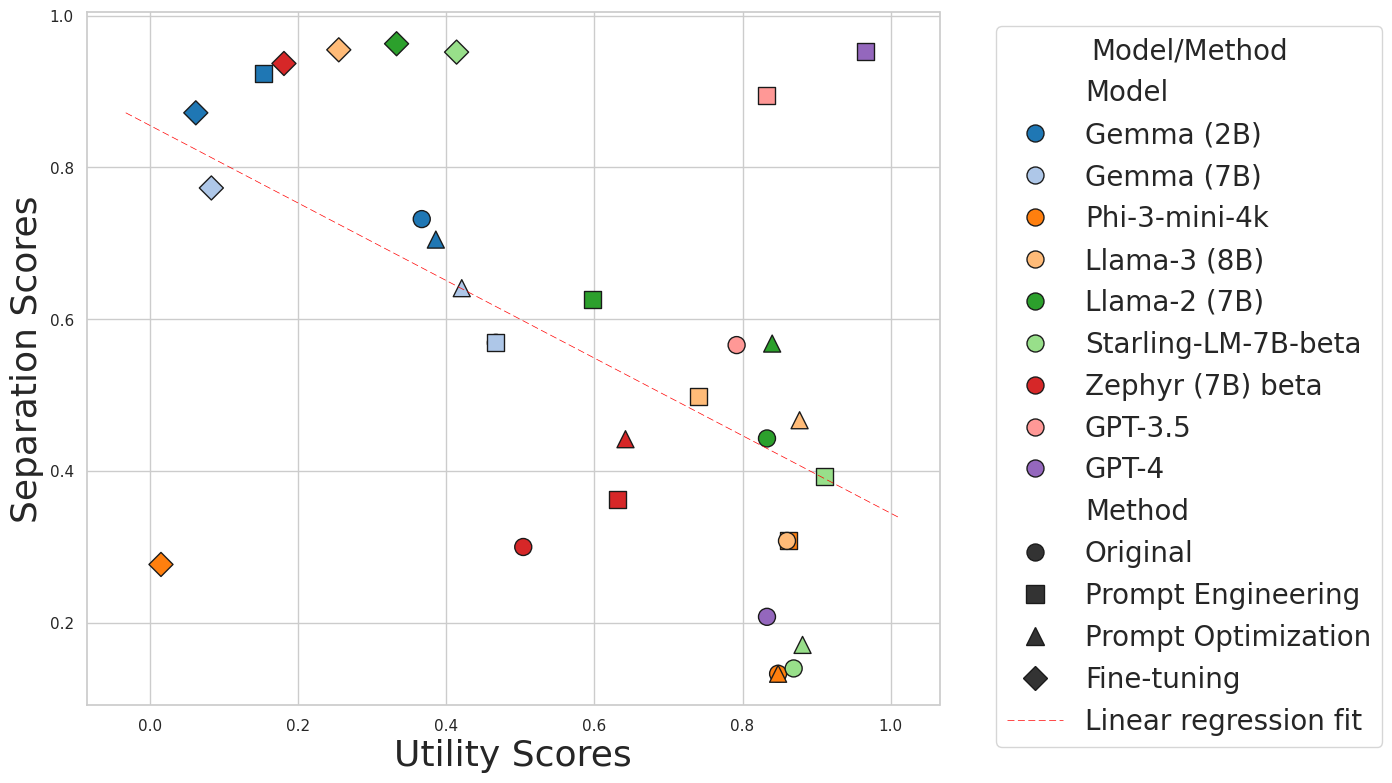

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.figure(figsize=(11, 9))
sns.set(style="whitegrid")

palette = sns.color_palette("tab20")

markers = {'Original': 'o', 'Prompt Engineering': 's', 'Prompt Optimization': '^', 'Fine-tuning': 'D'}

ax = sns.scatterplot(data=df, x='Utility Scores', y='Separation Scores', style='Method', hue='Model',
                     markers=markers, s=150, palette=palette, edgecolor="k")

intercept = theta_best[0]
slope = theta_best[1]

x_vals = np.array(ax.get_xlim())  
y_vals = intercept + slope * x_vals

plt.plot(x_vals, y_vals, color='red', linestyle=(0, (10, 5)), linewidth=0.5, label='Linear regression fit')  # Custom dashed line

plt.xlabel('Utility Scores', fontsize=26)
plt.ylabel('Separation Scores', fontsize=26)
plt.legend(title='Model/Method', fontsize=20, title_fontsize='20', bbox_to_anchor=(1.05, 1), loc=2)

# Save and show the plot
plt.savefig('plot_with_custom_dash_regression_line.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()


# Average SEP / UTIL scores

### SEP

In [83]:
model_to_sep
dimensions = model_to_sep["gemma2b"].keys()
res = {dim: [] for dim in dimensions}
for m in models:
    for dim in dimensions: 
        res[dim].append(model_to_sep[m][dim])

In [85]:
for dim, arr in res.items(): 
    print(f"Avg sep score for {dim} without GPTs is {np.mean(arr[:7])}")

Avg sep score for original without GPTs is 0.375
Avg sep score for peng without GPTs is 0.5258571428571428
Avg sep score for popt without GPTs is 0.44671428571428573
Avg sep score for ft without GPTs is 0.8184285714285714


In [86]:
for dim, arr in res.items(): 
    if dim in ("popt, ft"):
        continue
    print(f"Avg sep score for {dim} with GPTs is {np.mean(arr)}")

Avg sep score for original with GPTs is 0.37766666666666665
Avg sep score for peng with GPTs is 0.6143333333333334


### UTIL

In [87]:
model_to_util
dimensions = model_to_util["gemma2b"].keys()
res = {dim: [] for dim in dimensions}
for m in models:
    for dim in dimensions: 
        res[dim].append(model_to_util[m][dim])

In [88]:
for dim, arr in res.items(): 
    print(f"Avg sep score for {dim} without GPTs is {np.mean(arr[:7])}")

Avg sep score for original without GPTs is 0.6782857142857142
Avg sep score for peng without GPTs is 0.6228571428571429
Avg sep score for popt without GPTs is 0.6992857142857144
Avg sep score for ft without GPTs is 0.19185714285714286


In [89]:
for dim, arr in res.items(): 
    if dim in ("popt, ft"):
        continue
    print(f"Avg sep score for {dim} with GPTs is {np.mean(arr)}")

Avg sep score for original with GPTs is 0.7081111111111111
Avg sep score for peng with GPTs is 0.6842222222222223
